In [229]:
#importing data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [230]:
#import seaborn and numpy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [231]:
#Preliminary review of data
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [232]:
#Note: Number Scoring CR and Percent Scoring CR have "na" as a value and the scoring columns have "s" as a value. Will need to clean this 
print(df.head())

  School DBN                     School Name School Level  \
0     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
1     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
3     01M140          P.S. 140 Nathan Straus          K-8   
4     01M140          P.S. 140 Nathan Straus          K-8   

          Regents Exam  Year  Total Tested Mean Score Number Scoring Below 65  \
0  Common Core Algebra  2017             4          s                       s   
1   Living Environment  2015            16       77.9                       1   
2   Living Environment  2016             9         74                       1   
3  Common Core Algebra  2016             3          s                       s   
4  Common Core Algebra  2017             2          s                       s   

  Percent Scoring Below 65 Number Scoring 65 or Above  \
0                        s                          s   
1                      6.3      

In [237]:
#Note: Will need to convert non-numeric data types into numeric to run analysis/descriptives
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [239]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [241]:
#Data Cleaning: Dropping two columns that contain "na"

drop_cols=['Number Scoring CR','Percent Scoring CR']
df.drop(drop_cols, inplace=True,axis=1)

In [243]:
#Confirmed that two columns were dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
dtypes: int64(2), o

In [245]:
df['Number Scoring Below 65'] = pd.to_numeric(df['Number Scoring Below 65'], errors='coerce')

In [247]:
#Confirming conversion of object to numeric for Number Scoring Below 65
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   212331 non-null  object 
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     212331 non-null  object 
 9   Number Scoring 65 or Above   212331 non-null  object 
 10  Percent Scoring 65 or Above  212331 non-null  object 
 11  Number Scoring 80 or Above   212331 non-null  object 
 12  Percent Scoring 80 or Above  212331 non-null  object 
dtyp

In [249]:
#Converting remaining object types to numeric

df['Percent Scoring Below 65'] = pd.to_numeric(df['Percent Scoring Below 65'], errors='coerce')
df['Number Scoring 65 or Above'] = pd.to_numeric(df['Number Scoring 65 or Above'], errors='coerce')
df['Percent Scoring 65 or Above'] = pd.to_numeric(df['Percent Scoring 65 or Above'], errors='coerce')
df['Number Scoring 80 or Above'] = pd.to_numeric(df['Number Scoring 80 or Above'], errors='coerce')
df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'], errors='coerce')
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')

In [250]:
#Confirming
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
dtyp

In [253]:
#Summary Statistics (without removing NaN's)
df.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,212331.000000,212331.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000
mean,2015.956069,49.364200,65.998967,25.140297,41.933632,46.443516,58.067855,20.506655,22.692027
std,0.799726,93.023576,11.288883,37.155199,28.405737,85.187123,28.405517,56.301578,26.160987
min,2015.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,5.000000,58.300000,5.000000,17.500000,8.000000,36.000000,1.000000,2.200000
50%,2016.000000,20.000000,65.400000,13.000000,40.200000,21.000000,59.800000,5.000000,12.500000
75%,2017.000000,57.000000,73.400000,31.000000,64.000000,52.000000,82.500000,18.000000,34.500000
max,2017.000000,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000


In [255]:
#Data Cleaning: Dropping NaN's

columns_to_drop = ['Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65','Number Scoring 65 or Above','Percent Scoring 65 or Above','Number Scoring 80 or Above','Percent Scoring 80 or Above'] 

In [257]:
print(columns_to_drop)

['Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']


In [259]:
df_clean=df.dropna(subset=columns_to_drop)

In [261]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 137109 entries, 1 to 212325
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   137109 non-null  object 
 1   School Name                  137109 non-null  object 
 2   School Level                 137109 non-null  object 
 3   Regents Exam                 137101 non-null  object 
 4   Year                         137109 non-null  int64  
 5   Total Tested                 137109 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
dtypes: f

In [263]:
#Selecting one school for comparison analysis: P.p. 034 Franklin D. Roosevelt 

df_Franklin=df_clean[(df_clean['School DBN'] =='01M034')]

In [265]:
df_Franklin.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
19480,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8
19481,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2
54237,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,10,78.8,0.0,0.0,10.0,100.0,5.0,50.0


In [267]:
df_Franklin['Percent Scoring Below 65'].describe()

count    10.000000
mean      6.260000
std       6.110319
min       0.000000
25%       0.000000
50%       6.300000
75%      11.100000
max      16.700000
Name: Percent Scoring Below 65, dtype: float64

In [269]:
df_Franklin.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2015.300000,9.400000,76.750000,0.600000,6.260000,8.800000,93.760000,3.700000,38.600000
std,0.483046,3.777124,2.298429,0.516398,6.110319,3.552777,6.110319,2.057507,12.968423
min,2015.000000,6.000000,73.500000,0.000000,0.000000,5.000000,83.300000,1.000000,16.700000
25%,2015.000000,6.250000,74.375000,0.000000,0.000000,6.250000,88.900000,2.250000,27.375000
50%,2015.000000,9.000000,77.900000,1.000000,6.300000,8.000000,93.800000,3.000000,43.800000
75%,2015.750000,9.750000,77.975000,1.000000,11.100000,9.500000,100.000000,4.750000,48.600000
max,2016.000000,16.000000,80.000000,1.000000,16.700000,15.000000,100.000000,7.000000,50.000000


In [271]:
df_All_schools=df_clean[(df_clean['Regents Exam'] =='Living Environment')]
df_All_schools_exclude_Franklin=df[(df['School DBN'] !='01M034') & (df['Regents Exam'] =='Living Environment')]

In [273]:
#Descriptives All Schools for comparison

df_All_schools.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000,18243.000000
mean,2016.026421,74.041002,69.055413,23.543606,34.286197,50.497396,65.715233,21.473168,26.661958
std,0.818573,101.637694,9.888136,33.986023,25.217541,77.944702,25.217209,47.844262,27.833404
min,2015.000000,6.000000,36.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,20.000000,62.000000,3.000000,12.000000,11.000000,47.300000,2.000000,5.600000
50%,2016.000000,44.000000,67.800000,12.000000,33.300000,28.000000,66.700000,7.000000,15.800000
75%,2017.000000,89.000000,75.700000,30.000000,52.700000,59.000000,88.000000,21.000000,40.300000
max,2017.000000,1216.000000,96.800000,510.000000,100.000000,963.000000,100.000000,945.000000,100.000000


In [275]:
#Descriptives All Schools(Except Franklin) for comparison

df_All_schools_exclude_Franklin.describe()

,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
count,25519.000000,25519.000000,18233.000000,18233.000000,18233.000000,18233.000000,18233.000000,18233.000000,18233.000000
mean,2016.030644,55.503546,69.051193,23.556189,34.301569,50.520265,65.699852,21.482916,26.655411
std,0.817361,91.751963,9.889073,33.991091,25.215544,77.959916,25.215201,47.855548,27.838140
min,2015.000000,1.000000,36.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,7.000000,62.000000,3.000000,12.000000,11.000000,47.200000,2.000000,5.600000
50%,2016.000000,27.000000,67.800000,12.000000,33.300000,28.000000,66.700000,7.000000,15.800000
75%,2017.000000,70.000000,75.700000,30.000000,52.800000,59.000000,88.000000,21.000000,40.200000
max,2017.000000,1216.000000,96.800000,510.000000,100.000000,963.000000,100.000000,945.000000,100.000000


In [277]:
Franklin_Mean_Below_65=df_Franklin['Percent Scoring Below 65'].mean()

In [279]:
print(Franklin_Mean_Below_65)

6.26


In [281]:
All_Schools_Except_Franklin_Mean_Below_65=df_All_schools_exclude_Franklin['Percent Scoring Below 65'].mean()

In [283]:
print(All_Schools_Except_Franklin_Mean_Below_65)

34.30156858443482


In [285]:
Mean_Scores_Below_65 = [Franklin_Mean_Below_65,All_Schools_Except_Franklin_Mean_Below_65]

In [287]:
Schools_Below_65 = ['Franklin D. Roosevelt', 'All Other Schools'] 

In [289]:
print(Mean_Scores_Below_65)
print(Schools_Below_65)

[6.26, 34.30156858443482]
['Franklin D. Roosevelt', 'All Other Schools']


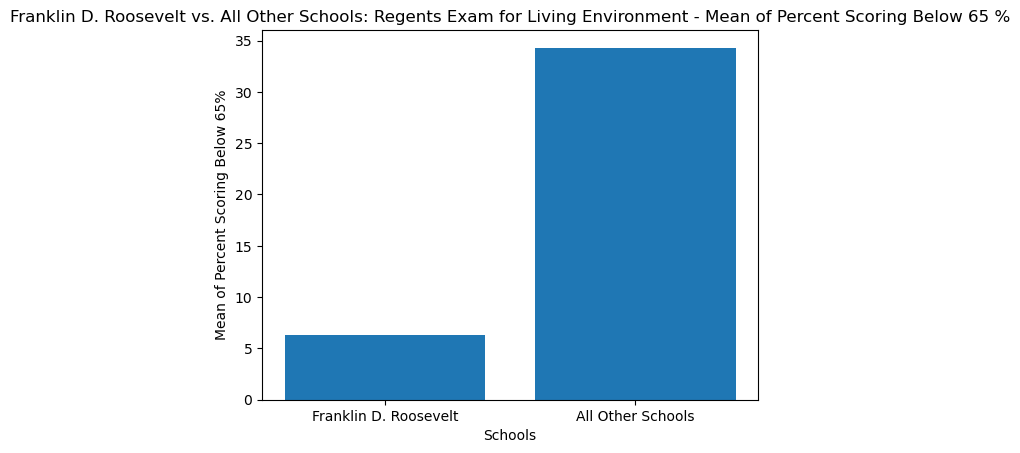

In [301]:
plt.bar(Schools_Below_65,Mean_Scores_Below_65)
plt.title('Franklin D. Roosevelt vs. All Other Schools: Regents Exam for Living Environment - Mean of Percent Scoring Below 65 %')
plt.xlabel("Schools")
plt.ylabel("Mean of Percent Scoring Below 65%")
plt.show()

In [297]:
Franklin_Mean_80_Above=df_Franklin['Percent Scoring 80 or Above'].mean()
All_Schools_Except_Franklin_Mean_80_Above=df_All_schools_exclude_Franklin['Percent Scoring 80 or Above'].mean()
Mean_Scores_80_Above = [Franklin_Mean_80_Above,All_Schools_Except_Franklin_Mean_80_Above]
Schools_80_Above = ['Franklin D. Roosevelt', 'All Other Schools'] 
print(Mean_Scores_80_Above)
print(Schools_80_Above)

[38.6, 26.655410519387917]
['Franklin D. Roosevelt', 'All Other Schools']


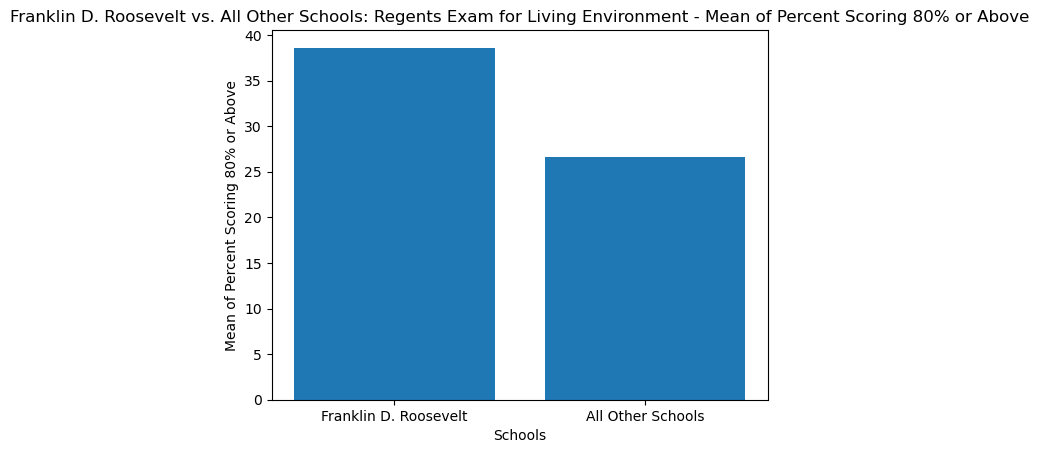

In [303]:
plt.bar(Schools_80_Above,Mean_Scores_80_Above)
plt.title('Franklin D. Roosevelt vs. All Other Schools: Regents Exam for Living Environment - Mean of Percent Scoring 80% or Above')
plt.xlabel("Schools")
plt.ylabel("Mean of Percent Scoring 80% or Above")
plt.show()

In [ ]:
#Summary Statement: For my analysis, I focused on the Regents Exam for Living Environment and compared Franklin D. Roosevelt to all other schools in the dataset. Franklin D. Roosevelt performed better than other schools. More specifically, Roosevelt had a lower mean percentage of students who scored below 65% on the exam when compared to all other schools. Additionally, Roosevelt had a higher mean percentage of students who scored 80% or higher on the exam when compared to all other schools. Note: means are calculated across the timespan available in the dataset and not limited to a specific year. To complete this analysis several steps were taken including an exploratory analysis of data and data cleaning which included removing unnecessary columns, converting object types to numeric to allow for descriptives and removal of NaNs.  